# IFT 6758 - Devoir 2

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Commencez par utiliser les fonctions créées dans `q1.py` pour rendre les données plus informatives et lisibles. Concrètement, remplissez les cellules suivantes :


In [16]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [17]:
# Charger le fichier `audio_segments.csv` dans un DataFrame `df`
df = pd.read_csv('/content/data/audio_segments.csv')

In [18]:
# Ajouter une colonne correspondant au nombre d'étiquettes appelée `label_count`
# Ici, il y a un problème ennuyeux avec l'accès à la colonne positive_labels
df['label_count'] = df[' positive_labels'].apply(count_labels)
print(df[[' positive_labels', 'label_count']].head())

                           positive_labels  label_count
0    /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk            4
1                                 /m/03l9g            1
2                                /m/01b_21            1
3  /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005            4
4         /m/07rgt08,/m/07sq110,/t/dd00001            3


In [19]:
# Ajouter une nouvelle colonne appelée `label_names` avec les noms d'étiquette traités au lieu de l'ID d'étiquette

# Imprimer le temps pris pour cette opération (soit en utilisant le module time ou timeit).
# Puisque nous n'exécutons ce code qu'une fois, ce n'est pas très problématique que cela prenne quelques minutes.
# Cependant, pour un ensemble de données plus volumineux, cela vaudrait la peine de l'accélérer
# (par exemple en créant un dictionnaire ID -> nom une fois et en l'utilisant).
import time

start_time = time.time()

df['label_names'] = df[' positive_labels'].apply(convert_ids)

end_time = time.time()

print(f"Colonne 'label_names' ajoutée avec succès en {end_time - start_time:.2f} secondes.")
print(df[[' positive_labels', 'label_names']].head())

Colonne 'label_names' ajoutée avec succès en 178.43 secondes.
                           positive_labels  \
0    /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk   
1                                 /m/03l9g   
2                                /m/01b_21   
3  /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005   
4         /m/07rgt08,/m/07sq110,/t/dd00001   

                                  label_names  
0    Domestic animals, pets|Squeak|Dog|Animal  
1                                      Hammer  
2                                       Cough  
3   Music|Speech|Female singing|Child singing  
4  Chuckle, chortle|Belly laugh|Baby laughter  


In [20]:
# Affichez le DataFrame et enregistrez-le dans `audio_segments_clean.csv` (sans index)
print(df)

df.to_csv('data/audio_segments_clean.csv', index=False)

print("Le fichier 'audio_segments_clean.csv' a été enregistré avec succès!")

            # YTID   start_seconds   end_seconds  \
0      --4gqARaEJE             0.0          10.0   
1      --BfvyPmVMo            20.0          30.0   
2      --U7joUcTCo             0.0          10.0   
3      --i-y1v8Hy8             0.0           9.0   
4      -0BIyqJj9ZU            30.0          40.0   
...            ...             ...           ...   
20366  zyF8TGSRvns           150.0         160.0   
20367  zz35Va7tYmA            30.0          40.0   
20368  zzD_oVgzKMc            30.0          40.0   
20369  zzNdwF40ID8            70.0          80.0   
20370  zzbTaK7CXJY            30.0          40.0   

                               positive_labels  label_count  \
0        /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk            4   
1                                     /m/03l9g            1   
2                                    /m/01b_21            1   
3      /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005            4   
4             /m/07rgt08,/m/07sq110,/t/dd00001            3 

### b)

Ensuite, à l'aide du DataFrame propre, remplissez les cellules suivantes pour mieux comprendre la distribution des étiquettes dans l'ensemble de données. Pour chaque graphique ci-dessous, assurez-vous d'inclure les **noms d'axe** appropriés et un **titre**.

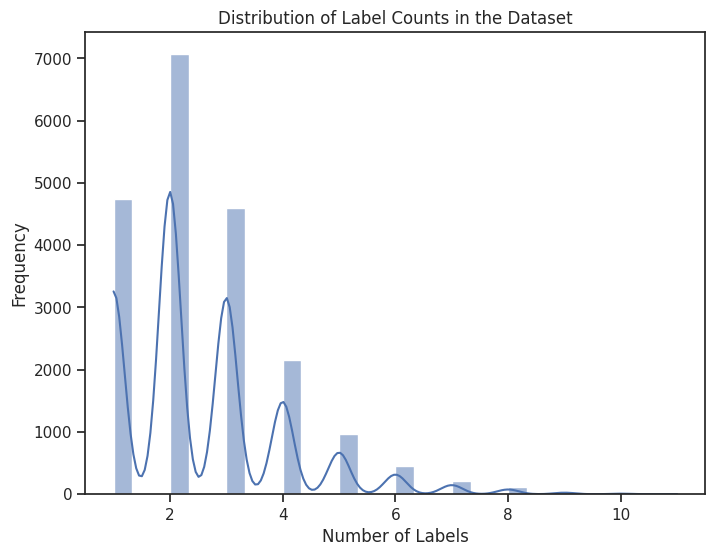

In [21]:
# À l'aide de seaborn, créez un histogramme du nombre d'étiquettes des rangées dans le DataFrame
plt.figure(figsize=(8, 6))
sns.histplot(df['label_count'], bins=30, kde=True)

plt.title('Distribution of Label Counts in the Dataset')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')

plt.show()

Suivez les étapes ci-dessous pour créer un heatmap montrant la "corrélation" entre différentes étiquettes.
- Plus précisément, chaque cellule de la heatmap doit correspondre à la probabilité qu'un échantillon avec l'étiquette de ligne correspondante ait également l'étiquette de colonne correspondante.
- Considérez simplement les étiquettes ["Piano", "Classical music", "Speech", "Conversation", "Screaming"].

Votre graphique final devrait ressembler à ceci :

![alt text](images/heatmap.png "Heatmap")

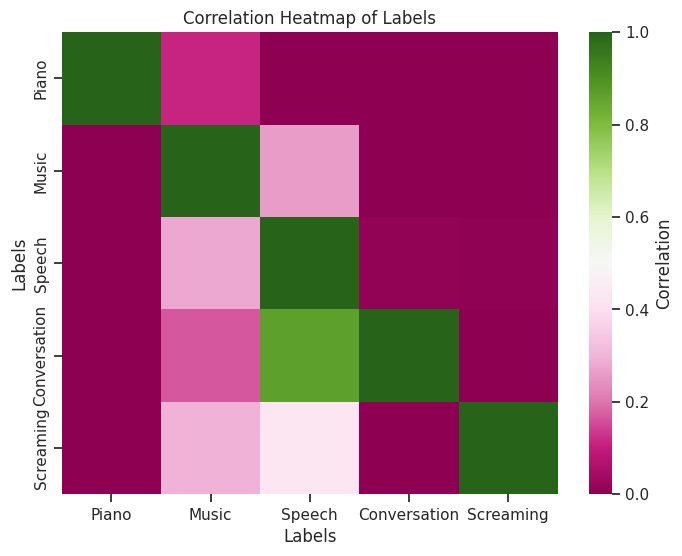

In [22]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# Il y a plusieurs façons d'aborder cela, la façon que nous recommandons ici est de construire d'abord une grille 2D où chaque
# value est la valeur de corrélation entre la ligne/colonne correspondante à l'aide des fonctions créées dans q1.py.
correlation_matrix = np.zeros((len(labels), len(labels)))

row = 0
for label_1 in labels:
    col = 0
    for label_2 in labels:
        correlation_matrix[row, col] = get_correlation(df['label_names'], label_1, label_2)
        col += 1
    row += 1

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='PiYG',
            xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Correlation'})

plt.title('Correlation Heatmap of Labels')
plt.xlabel('Labels')
plt.ylabel('Labels')

plt.show()

## Question 2
La question 2 n'a pas de composante notebook, remplissez simplement le fichier `q2.py`.

## Question 4
Pour les cellules suivantes, utilisez l'ID "0GNNFBrRz1E". Complétez les fonctions et exécutez les cellules fournies ci-dessous.

In [23]:
import librosa

In [24]:
# Jouez le segment audio dans le notebook en utilisant
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio
from IPython.display import Audio

audio_path = "/content/0GNNFBrRz1E.mp3"

Audio(filename=audio_path, rate=None)

Output hidden; open in https://colab.research.google.com to view.

Une façon de visualiser l'audio consiste à utiliser des spectrogrammes mel. Brièvement, les spectrogrammes Mel convertissent l'audio en une image 2D grâce à l'utilisation de Fourier Transforms (plus de détails peuvent être trouvés ici: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

In [29]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """

    En utilisant librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) écrivez une fonction qui:
    1. Charge l'audio à partir d'un mp3_path (en utilisant librosa)
    2. Le convertit en un spectrogramme mel (en utilisant les paramètres fournis ci-dessus)
    3. Applique la transformation d'échelle logarithmique au spectrogramme mel (fourni ci-dessus une fois de plus)
    4. Renvoie le spectrogramme mel transformé

    Assurez-vous de passer le sample rate
    """
    # Charger l'audio avec librosa
    y, sr = librosa.load(mp3_path, sr=sample_rate)

    # Créer un spectrogramme mel
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=stft_hopsize)

    # Appliquer la transformation logarithmique
    log_mel_spectrogram = to_log_scale(mel_spectrogram)

    return log_mel_spectrogram

create_mel_spectrogram("/content/0GNNFBrRz1E_40_50_10.mp3")

array([[-1.8827845, -1.5601588, -1.4646549, ..., -3.009731 , -2.2906556,
        -2.5672584],
       [-2.0318844, -1.7548698, -1.7069529, ..., -2.8058805, -2.1916726,
        -2.5339544],
       [-2.2459776, -2.0842986, -2.2126784, ..., -2.6508985, -2.0999029,
        -2.4948595],
       ...,
       [-6.662411 , -6.6872106, -6.75362  , ..., -6.6902976, -6.5793834,
        -6.7063293],
       [-6.8368154, -6.7856283, -6.838212 , ..., -6.808725 , -6.8111067,
        -6.85432  ],
       [-6.876182 , -6.8873982, -6.9035735, ..., -6.9054117, -6.905505 ,
        -6.904412 ]], dtype=float32)

Les données audio peuvent également être visualisées en regardant la forme d'onde (c'est-à-dire sous la forme d'un tracé linéaire des valeurs d'amplitude). Nous combinerons les deux méthodes de visualisation ci-dessous. Le graphique résultant devrait ressembler à :
![alt text](images/combined_plot.png "Combined Plot")

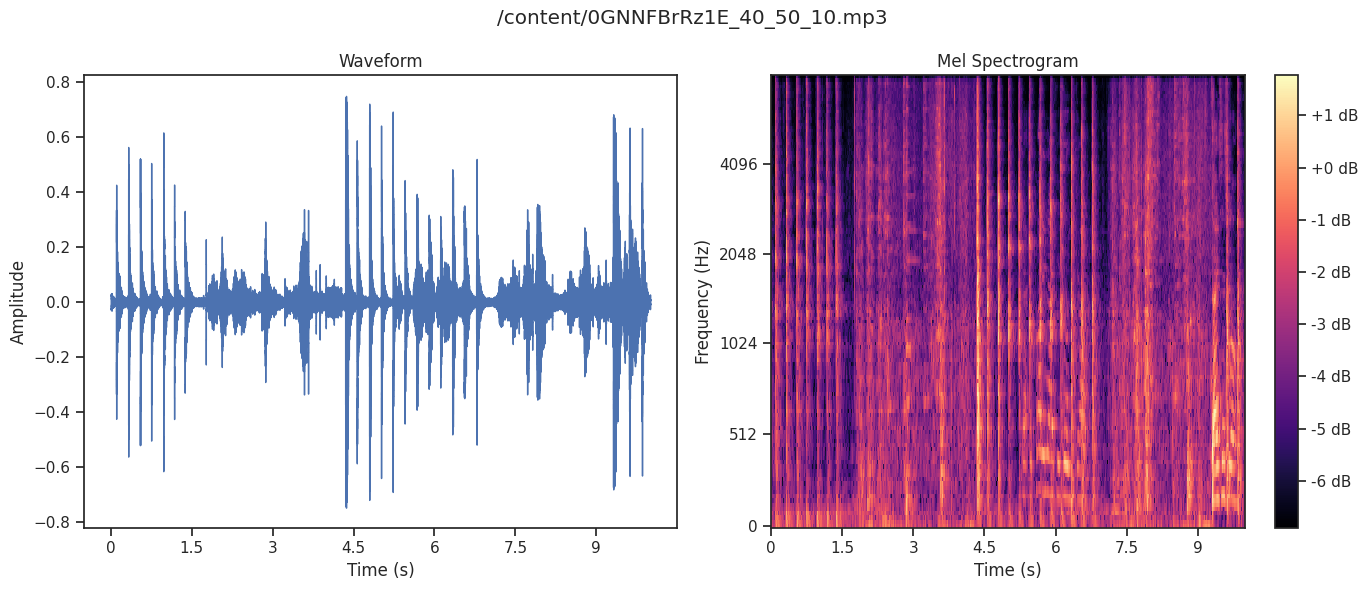

In [31]:
def plot_audio(mp3_path: str) -> None:
    """
    En utilisant matplotlib et create_mel_spectrogram() écrivez une fonction qui prend un mp3_path et trace
    à la fois la forme d'onde (graphique linéaire des amplitudes) et le spectrogramme mel côte à côte en tant que subplots.

    Utilisez le mp3_path comme titre principal unique pour tout le graphique
    """
    y, sr = librosa.load(mp3_path, sr=sample_rate)

    mel_spectrogram = create_mel_spectrogram(mp3_path)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    librosa.display.waveshow(y, sr=sr, ax=ax1)
    ax1.set_title("Waveform")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude")

    img = librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=stft_hopsize, x_axis='time', y_axis='mel', ax=ax2)
    fig.colorbar(img, ax=ax2, format='%+2.0f dB')
    ax2.set_title("Mel Spectrogram")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Frequency (Hz)")

    plt.suptitle(mp3_path)

    plt.tight_layout()
    plt.show()


plot_audio("/content/0GNNFBrRz1E_40_50_10.mp3")